In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['font.serif'] = ['FandSong']
mpl.rcParams['axes.unicode_minus'] = False

In [39]:
DATA_DIR = '/Users/Rambo/Downloads/highschool_data/'
DATA_OUTPUT_DIR = "/Users/Rambo/Documents/GZ_output/"

SUBJECT = ['yuwen','shuxue','yingyu','tongyongjishu','wuli','huaxue','shengwu','zhengzhi','lishi','dili']

COLUMNS = {"试题编号","参考学生数","得分人数","得分率","平均分","难度","标准差","斯皮尔曼区分度","皮尔顺区分度","A等平均分","B等平均分","C等平均分","D等平均分"}

RANK_MAP = {"dili":"Dlfd","yuwen":"Ywfd","huaxue":"Hxfd","lishi":"Lsfd","shengwu":"Swfd","wuli":"Wlfd",
            "zhengzhi":"Zzfd","tiyu":"Tyfd","shuxue":"Sxfd","yingyu":"Yyfd","tongyongjishu":"xxjsfd"}

SUBJECT_MAP = {"dili":"地理","yuwen":"语文","huaxue":"化学","lishi":"历史","shengwu":"生物","wuli":"物理",
            "zhengzhi":"政治","tiyu":"体育","shuxue":"数学","yingyu":"英语","tongyongjishu":"信息技术"}

CITY_MAP = {1:"贵阳",2:"遵义",3:"安顺",4:"毕节",5:"铜仁",6:"六盘水",7:"黔南州",8:"黔东南",9:"黔西南"}

SCHOOL_TYPE_MAP = {'class_1':"一类示范性高中", 'class_2':"二类示范性高中", 'class_3':"三类示范性高中", 'class_4':"非示范性高中"}
def dirToString(subject,type):
    typeToDir={
        "item":DATA_DIR+subject+'ItemInfor.csv',
        "score":DATA_DIR+subject+'Score.txt',
        "rank":DATA_DIR+"等级数据.txt",
        "option":DATA_DIR+subject+"Options.txt",
        "dist":DATA_DIR+"区县信息.csv",
        "school":DATA_DIR+"学校信息.csv"
    }
    return typeToDir.get(type)

subject = "dili"

(array([1, 2, 3, 4, 5]), <a list of 5 Text xticklabel objects>)

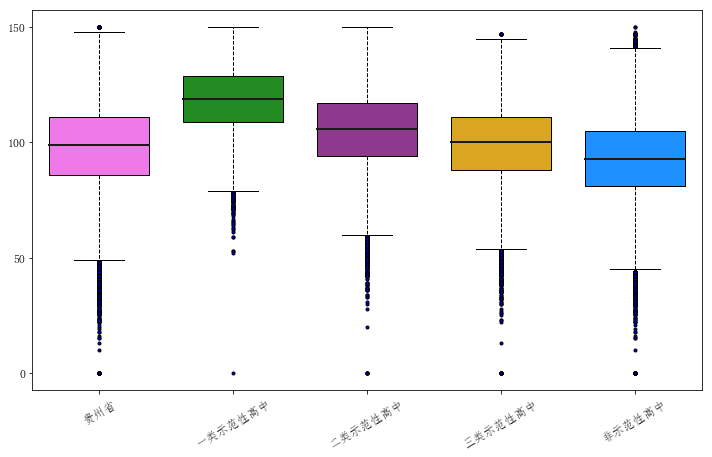

In [58]:
dfscore = pd.read_csv(dirToString(subject,"score"),delimiter="\t")
dfschool = pd.read_csv(dirToString(subject,"school"))
#经观察，score以schID（index）与school中schID（index）连接，再由demoType分组
df_noAbsent_score = dfscore.loc[dfscore["absent"] == "N"]
df_sch_score = df_noAbsent_score[["schID","totalScore"]]
df_sch_demo = dfschool[["schID","demoType"]].set_index("schID")
df_merge = pd.merge(df_sch_score,df_sch_demo,how="inner",left_on="schID",right_on="schID")
series_gb_demo = df_merge.groupby("demoType")["totalScore"]

#贵州省
list_data = [df_noAbsent_score["totalScore"].tolist()]
list_data = list_data + [list(data.values) for key,data in series_gb_demo]
list_name = ["贵州省"]
list_name = list_name + [SCHOOL_TYPE_MAP[key] for key,data in series_gb_demo]

#绘图
plt.figure(num=0,figsize=(12,7))
boxes = plt.boxplot(list_data,sym='.',patch_artist=True,labels=list_name,widths=0.75)
#attribute
boxes_color=['#EE7AE9','#228B22','#8E388E','#DAA520','#1E90FF']

for box,color in zip(boxes["boxes"],boxes_color):
    box.set( color='k', linewidth=1)
    box.set( facecolor = color )
for median in boxes["medians"]:
    median.set(color="#1A1A1A",linewidth=2)
for flier in boxes["fliers"]:
    flier.set(marker='.',fillstyle="full",markerfacecolor='b')
for whisker in boxes['whiskers']:
    whisker.set(color='k', linewidth=1)    
for whisker in boxes['whiskers']:
    whisker.set(linestyle="--")    
plt.yticks(np.linspace(0,150,4),size="large")
plt.xticks(size="large",rotation=30)
